## 1. Data Exploration

In [ ]:
# load libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings

In [ ]:
# setup configuration
pd.set_option("display.max_columns", None)
filterwarnings("ignore")
plt.style.use("ggplot")

In [ ]:
# read dataset
data = pd.read_csv("Unicauca-dataset-April-June-2019-Network-flows.csv")

In [ ]:
data.head()

,flow_key,src_ip_numeric,src_ip,src_port,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,max_ps,avg_ps,std_dev_ps,flowStart,flowEnd,flowDuration,min_piat,max_piat,avg_piat,std_dev_piat,f_pktTotalCount,f_octetTotalCount,f_min_ps,f_max_ps,f_avg_ps,f_std_dev_ps,f_flowStart,f_flowEnd,f_flowDuration,f_min_piat,f_max_piat,f_avg_piat,f_std_dev_piat,b_pktTotalCount,b_octetTotalCount,b_min_ps,b_max_ps,b_avg_ps,b_std_dev_ps,b_flowStart,b_flowEnd,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,flowEndReason,category,application_protocol,web_service
0,3acee4f4ea001cd5e6d9584d4036b53d,3232266497,192.168.121.1,67,172.16.255.185,67,17,22,7620,328,394,346.363636,25.010081,1.555954e+09,1.555955e+09,1701.385427,0.000313,198.656500,81.018354,78.913442,17,5670,328,354,333.529412,9.140200,1.555954e+09,1.555955e+12,1701.385427,0.010463,198.657170,106.336589,74.034708,5,1950,389,394,390.000000,2.000000,1.555955e+09,1.555955e+09,1.554399e+12,0.010354,198.657965,51.689181,84.916348,2,Network,Unknown,DHCP
1,974ec5991b439c9a7176b88be0c90df0,3232266497,192.168.121.1,67,172.16.255.186,67,17,17,5670,328,354,333.529412,9.140200,1.555954e+09,1.555955e+09,1701.385515,0.010356,198.657267,106.336595,74.034707,17,5670,328,354,333.529412,9.140200,1.555954e+09,1.555955e+12,1701.385515,0.010356,198.657267,106.336595,74.034707,0,0,0,0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2,Network,Unknown,DHCP
2,3acee4f4ea001cd5e6d9584d4036b53d,3232266497,192.168.121.1,67,172.16.255.185,67,17,43,15124,328,394,351.720930,26.098495,1.555964e+09,1.555965e+09,1450.967340,0.000239,248.424737,34.546841,58.972989,30,10062,328,352,335.400000,9.718024,1.555964e+09,1.555965e+12,1450.967340,0.015413,248.424737,50.033357,65.290032,13,5062,389,394,389.384615,1.332347,1.555964e+09,1.555965e+09,1.554409e+12,0.022332,340.268454,89.927588,124.270745,2,Network,Unknown,DHCP
3,974ec5991b439c9a7176b88be0c90df0,3232266497,192.168.121.1,67,172.16.255.186,67,17,30,10086,328,352,336.200000,10.057833,1.555964e+09,1.555965e+09,1450.967130,0.015330,248.424689,50.033349,65.510537,30,10086,328,352,336.200000,10.057833,1.555964e+09,1.555965e+12,1450.967130,0.015330,248.424689,50.033349,65.510537,0,0,0,0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2,Network,Unknown,DHCP
4,cfa7c2740072befaa89c202499729e08,3232266497,192.168.121.1,0,10.130.1.166,0,1,1,56,56,56,56.000000,0.000000,1.555966e+09,1.555966e+09,0.000000,0.000000,0.000000,0.000000,0.000000,1,56,56,56,56.000000,0.000000,1.555966e+09,1.555966e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2,Network,Unknown,ICMP


In [ ]:
data.shape

(2704839, 50)

In [ ]:
# filter dataset
## only used rows contains "web_service" values more than 10k
data = data.groupby("web_service").filter(lambda x: len(x) > 10000)

In [ ]:
data.shape

(2574080, 50)

## 1.1 Dataset Overview

In [ ]:
# find general info related dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2574080 entries, 15 to 2704838
Data columns (total 50 columns):
 #   Column                Dtype  
---  ------                -----  
 0   flow_key              object 
 1   src_ip_numeric        int64  
 2   src_ip                object 
 3   src_port              int64  
 4   dst_ip                object 
 5   dst_port              int64  
 6   proto                 int64  
 7   pktTotalCount         int64  
 8   octetTotalCount       int64  
 9   min_ps                int64  
 10  max_ps                int64  
 11  avg_ps                float64
 12  std_dev_ps            float64
 13  flowStart             float64
 14  flowEnd               float64
 15  flowDuration          float64
 16  min_piat              float64
 17  max_piat              float64
 18  avg_piat              float64
 19  std_dev_piat          float64
 20  f_pktTotalCount       int64  
 21  f_octetTotalCount     int64  
 22  f_min_ps              int64  
 23  f_max_

In [ ]:
# overview statistics aspect of dataset
data.describe()

,src_ip_numeric,src_port,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,max_ps,avg_ps,std_dev_ps,flowStart,flowEnd,flowDuration,min_piat,max_piat,avg_piat,std_dev_piat,f_pktTotalCount,f_octetTotalCount,f_min_ps,f_max_ps,f_avg_ps,f_std_dev_ps,f_flowStart,f_flowEnd,f_flowDuration,f_min_piat,f_max_piat,f_avg_piat,f_std_dev_piat,b_pktTotalCount,b_octetTotalCount,b_min_ps,b_max_ps,b_avg_ps,b_std_dev_ps,b_flowStart,b_flowEnd,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,flowEndReason
count,2.574080e+06,2.574080e+06,2.574080e+06,2.574080e+06,2.574080e+06,2.574080e+06,2.574080e+06,2.574080e+06,2.574080e+06,2.574080e+06,2.574080e+06,2.574080e+06,2.574080e+06,2.574080e+06,2.574080e+06,2.574080e+06,2.574080e+06,2.574080e+06,2.574080e+06,2.574080e+06,2.574080e+06,2.574080e+06,2.574080e+06,2.574080e+06,2.574080e+06,2.574080e+06,2.574080e+06,2.574080e+06,2.574080e+06,2.574080e+06,2.574080e+06,2.574080e+06,2.574080e+06,2.574080e+06,2.574080e+06,2.574080e+06,2.574080e+06,2.574080e+06,2.574080e+06,2.574080e+06,2.574080e+06,2.574080e+06,2.574080e+06,2.574080e+06
mean,3.232268e+09,5.131486e+04,2.632012e+03,1.077021e+01,8.276720e+01,9.928167e+04,5.735650e+01,1.255619e+03,2.285764e+02,2.768494e+02,1.557244e+09,1.557244e+09,5.188053e+01,1.840815e+00,2.292163e+01,4.732148e+00,5.743853e+00,3.402371e+01,1.320412e+04,5.933742e+01,4.118122e+02,1.337763e+02,1.084043e+02,1.557244e+09,8.429683e+11,4.941869e+01,3.611519e+00,2.170531e+01,6.966648e+00,5.695544e+00,4.874348e+01,8.607755e+04,6.898420e+01,1.148814e+03,2.896540e+02,2.832265e+02,1.344603e+09,1.344603e+09,7.087776e+11,1.806317e+00,1.556354e+01,4.009264e+00,4.012574e+00,2.656140e+00
std,7.165106e+02,1.279029e+04,8.968162e+03,5.451369e+00,3.695229e+03,4.903634e+06,5.920002e+01,2.946935e+03,3.438120e+02,5.392214e+02,1.612417e+06,1.612416e+06,1.764911e+02,3.319450e+01,8.563237e+01,3.888694e+01,2.715108e+01,1.936071e+03,2.665733e+06,6.681007e+01,7.551668e+02,2.016730e+02,2.187058e+02,1.612417e+06,7.752625e+11,1.737390e+02,4.817421e+01,8.395637e+01,5.167773e+01,2.384351e+01,2.210223e+03,4.061670e+06,7.489918e+01,2.922756e+03,5.993754e+02,6.333395e+02,5.346335e+08,5.346335e+08,7.747562e+11,3.438498e+01,6.001135e+01,3.625745e+01,1.604752e+01,8.908980e-01
min,3.232266e+09,2.200000e+01,0.000000e+00,6.000000e+00,1.000000e+00,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,0.000000e+00,1.555954e+09,1.555954e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,0.000000e+00,1.555954e+09,1.555954e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
25%,3.232267e+09,4.979200e+04,5.300000e+01,6.000000e+00,2.000000e+00,1.600000e+02,4.000000e+01,8.300000e+01,6.900000e+01,8.000000e+00,1.556055e+09,1.556055e+09,6.301403e-04,2.145767e-06,6.258488e-04,6.098747e-04,0.000000e+00,1.000000e+00,6.500000e+01,4.000000e+01,6.100000e+01,6.000000e+01,0.000000e+00,1.556055e+09,1.556295e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,7.700000e+01,4.000000e+01,5.200000e+01,4.600000e+01,0.000000e+00,1.556031e+09,1.556031e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
50%,3.232268e+09,5.324000e+04,4.430000e+02,6.000000e+00,3.000000e+00,3.050000e+02,5.200000e+01,1.640000e+02,1.075000e+02,4.450000e+01,1.556291e+09,1.556291e+09,1.692610e-01,9.894371e-05,1.243970e-01,3.562419e-02,6.610846e-03,2.000000e+00,1.520000e+02,5.200000e+01,7.800000e+01,7.300000e+01,0.000000e+00,1.556291e+09,1.555969e+12,5.037546e-02,1.907349e-06,2.918744e-02,8.425113e-03,0.000000e+00,1.000000e+00,1.590000e+02,4.000000e+01,1.380000e+02,1.150000e+02,0.000000e+00,1.556139e+09,1.556139e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
75%,3.232268e+09,5.898200e+04,4.4300

In [ ]:
# overview missing values
data.isna().sum()

flow_key                0
src_ip_numeric          0
src_ip                  0
src_port                0
dst_ip                  0
dst_port                0
proto                   0
pktTotalCount           0
octetTotalCount         0
min_ps                  0
max_ps                  0
avg_ps                  0
std_dev_ps              0
flowStart               0
flowEnd                 0
flowDuration            0
min_piat                0
max_piat                0
avg_piat                0
std_dev_piat            0
f_pktTotalCount         0
f_octetTotalCount       0
f_min_ps                0
f_max_ps                0
f_avg_ps                0
f_std_dev_ps            0
f_flowStart             0
f_flowEnd               0
f_flowDuration          0
f_min_piat              0
f_max_piat              0
f_avg_piat              0
f_std_dev_piat          0
b_pktTotalCount         0
b_octetTotalCount       0
b_min_ps                0
b_max_ps                0
b_avg_ps                0
b_std_dev_ps

## 1.2. Dataset Distribution Overview

### 1.2.1 Overview non-numeric Feature

In [ ]:
data.select_dtypes("O").sample(10)

,flow_key,src_ip,dst_ip,category,application_protocol,web_service
1993488,69507585f96d2ff7b595158db4f2035d,192.168.122.50,172.217.8.106,Web,Unknown,Google
1285878,73533865b99ad8fa8c1ad41d1a0df455,192.168.122.54,172.16.255.200,Web,DNS,Google
283326,1e8f35ba5bf8b4a3f2fe16d71c94260f,192.168.121.60,10.20.4.43,Web,Unknown,HTTP
1435187,cbd4f250494d7afbd96b2700244451d6,192.168.127.15,13.32.115.7,Web,TLS,Amazon
837790,94b70e448fa08fa67ea3fcb5f86e5d86,192.168.122.47,172.16.255.200,Network,Unknown,DNS
1119986,e0513150525f3e51d7772bd6e7bbac8d,192.168.128.42,31.13.67.11,Chat,TLS,Messenger
2283202,ff3010c6a6f142b463e0718261a8f000,192.168.127.67,173.222.113.68,Web,Unknown,TLS
2368579,5e2250b29a0240b788a011b3a817f959,192.168.128.54,216.58.192.46,Web,TLS,Google
2338467,230fa1b84c4f90a0523e2d01c3159697,192.168.128.16,62.212.87.142,Web,Unknown,HTTP
994002,5ca4d35feb21b5a338d212c51d224da6,192.168.127.13,172.217.3.133,Web,TLS,Google


In [ ]:
data['category'].value_counts()

Web                                  1391955
Network                               427520
Unspecified                           249071
SocialNetwork                         147138
Download-FileTransfer-FileSharing      70757
Chat                                   68984
Media                                  63853
VoIP                                   38788
Cloud                                  34596
Collaborative                          25471
System                                 24017
Email                                  20728
SoftwareUpdate                         11195
Streaming                                  7
Name: category, dtype: int64

In [ ]:
data['application_protocol'].value_counts()

Unknown         1265365
TLS              658927
DNS              455342
HTTP             123268
QUIC              68011
IMAPS              1782
STUN                943
SMTPS               205
POPS                184
FacebookZero         13
SMBv23               11
NetBIOS               9
PostgreSQL            5
MQTT                  5
SMTP                  3
RDP                   2
ApplePush             2
SSH                   1
SOCKS                 1
BitTorrent            1
Name: application_protocol, dtype: int64

In [ ]:
data['application_protocol'].value_counts()

Unknown         1265365
TLS              658927
DNS              455342
HTTP             123268
QUIC              68011
IMAPS              1782
STUN                943
SMTPS               205
POPS                184
FacebookZero         13
SMBv23               11
NetBIOS               9
PostgreSQL            5
MQTT                  5
SMTP                  3
RDP                   2
ApplePush             2
SSH                   1
SOCKS                 1
BitTorrent            1
Name: application_protocol, dtype: int64

In [ ]:
data['web_service'].value_counts()

Google            569828
DNS               419915
TLS               259590
Unknown           249071
Microsoft         172392
HTTP              152705
Facebook          120849
Amazon             87575
GoogleServices     87478
BitTorrent         70757
YouTube            55847
Messenger          45168
HTTP_Proxy         33853
Office365          24471
NetBIOS            24016
WhatsApp           23816
IMO                22858
GMail              20728
Dropbox            19239
Cloudflare         16929
Skype              15930
Instagram          15661
UbuntuONE          15357
MSN                14415
SNMP               13809
WindowsUpdate      11195
Twitter            10628
Name: web_service, dtype: int64

### 1.2.2 Overview Numeric Feature

In [ ]:
numerical_data = data.drop(data.select_dtypes("O").columns.tolist(), axis = 1)

In [ ]:
num_corr = numerical_data.corr()

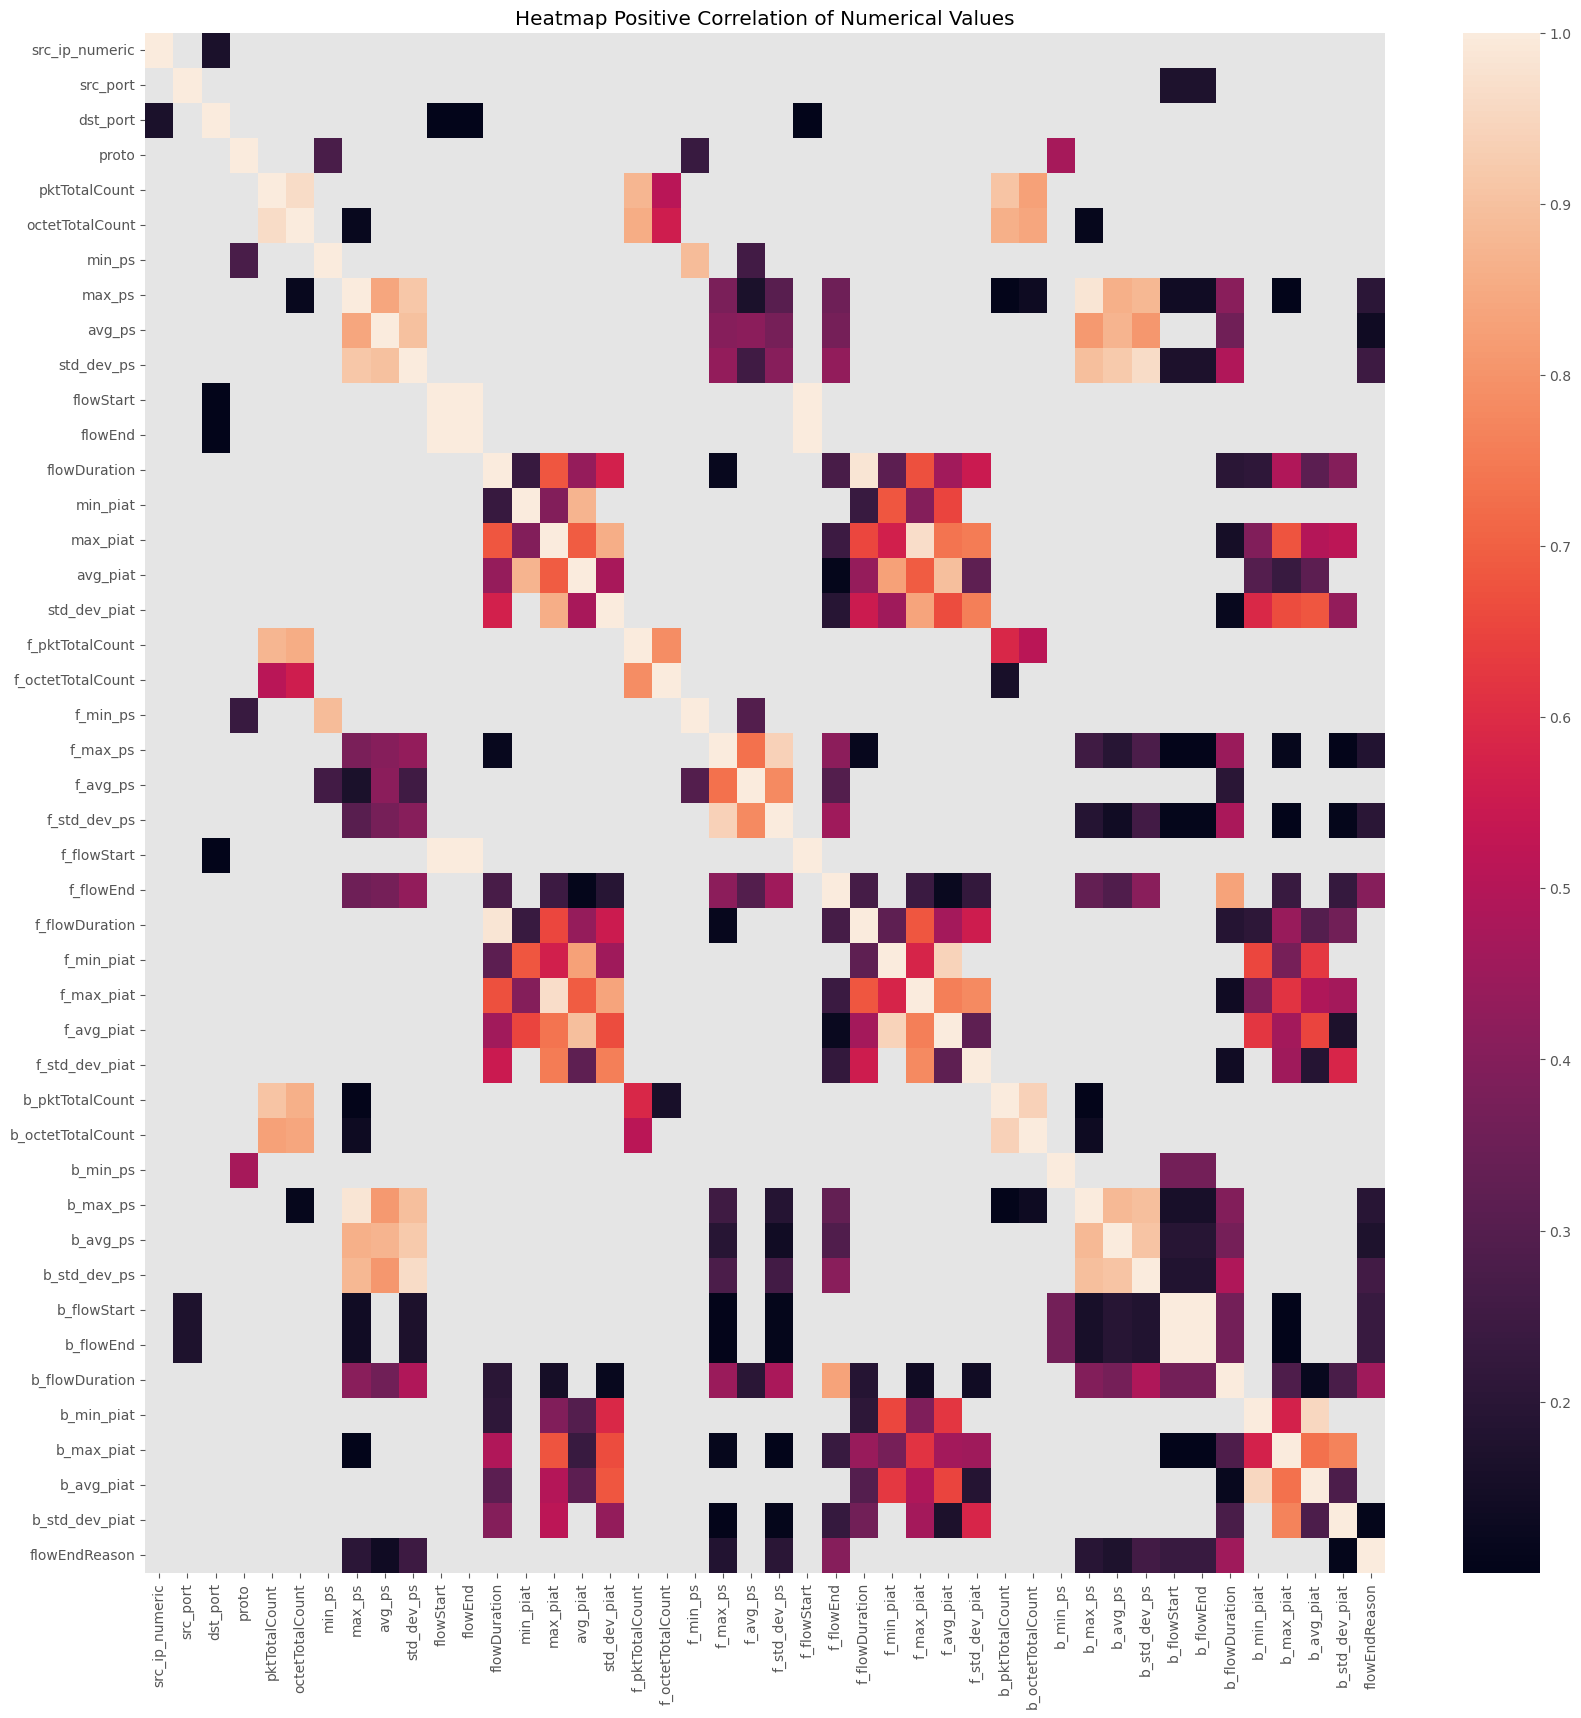

In [ ]:
# Positive Correlation
num_corr_pos = num_corr[num_corr > 0.1]
plt.figure(figsize = (20, 20))
g = sns.heatmap(num_corr_pos)
g.set_title("Heatmap Positive Correlation of Numerical Values");

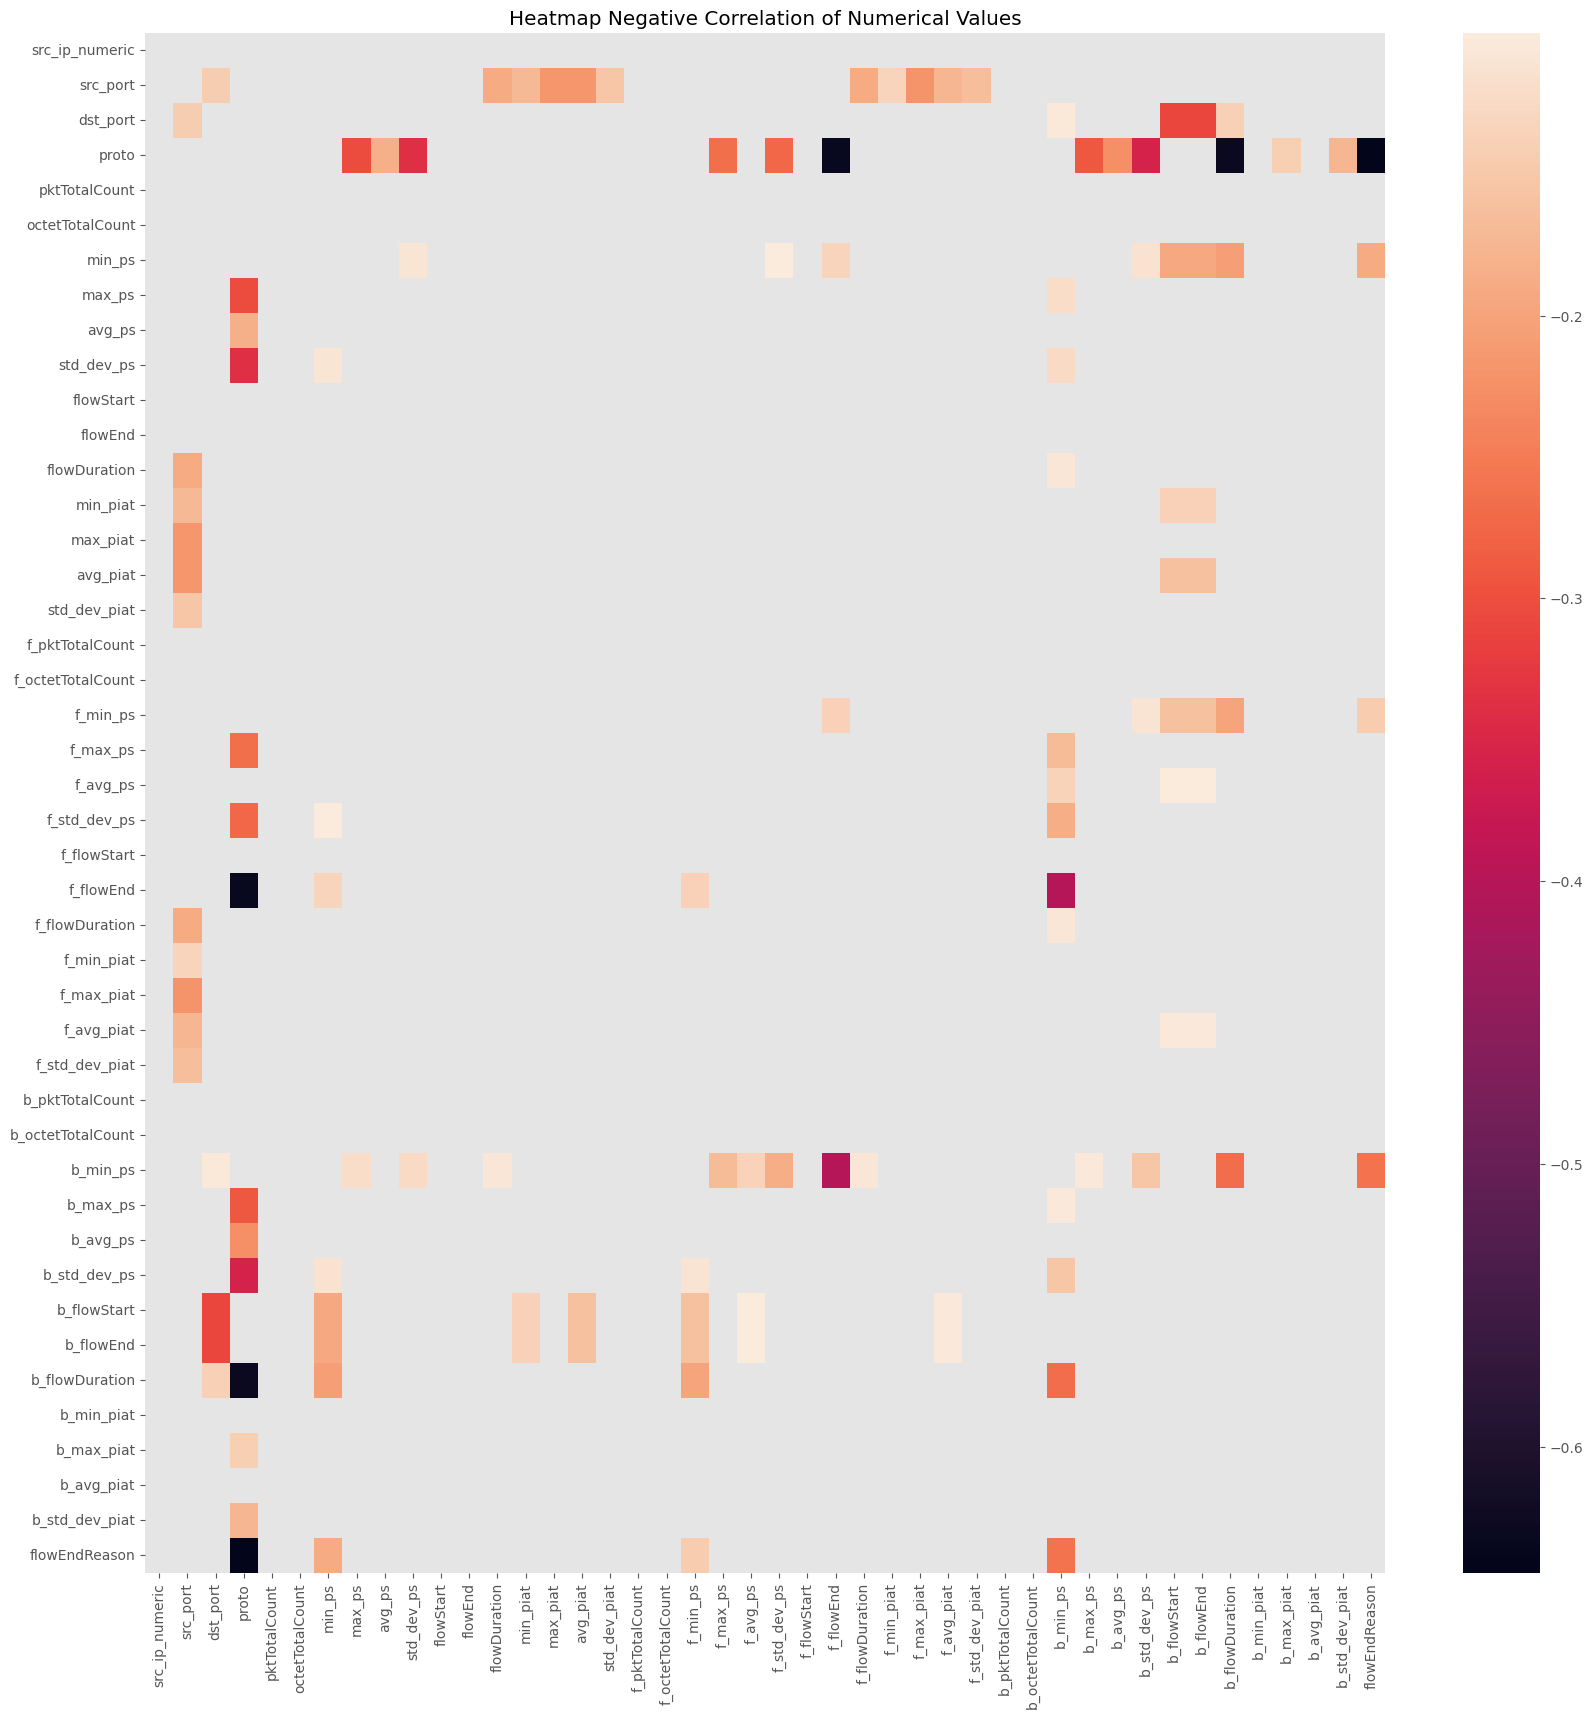

In [ ]:
# Negative Correlation
num_corr_neg = num_corr[num_corr < -0.1]
plt.figure(figsize = (20, 20))
g = sns.heatmap(num_corr_neg)
g.set_title("Heatmap Negative Correlation of Numerical Values");

## 1.3. Feature Analysis

In [ ]:
# load libraries
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
# define feature and target
feature = data.drop(data.select_dtypes("O").columns.tolist(), axis = 1)
target  = data['web_service'].values

In [ ]:
# check dimension of feature and target
feature.shape, target.shape

((2574080, 44), (2574080,))

### 1.3.1. Univariate Analysis

![](https://mlwhiz.com/images/fs/7.jpg)

In [ ]:
# define K-Best using Chi2 to get all feature score
best_feature = SelectKBest(score_func = chi2, k = 44)
best_feature_fit = best_feature.fit(feature, target)

In [ ]:
# wrap as dataframe
feature_score_df = pd.DataFrame({
    "Column" : feature.columns.tolist(),
    "Score"  : best_feature_fit.scores_.tolist()
})

In [ ]:
# overview all feature score based on chi2 calculation
feature_score_df

,Column,Score
0,src_ip_numeric,2.943791e+01
1,src_port,2.114641e+09
2,dst_port,3.577406e+10
3,proto,3.457718e+06
4,pktTotalCount,2.902300e+08
5,octetTotalCount,6.000596e+11
6,min_ps,1.075802e+07
7,max_ps,2.706423e+09
8,avg_ps,1.968057e+08
9,std_dev_ps,4.977473e+08


### 1.3.2. Outlier Analysis

![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*sdj-K1VLwL_8c07t10h_Bw.jpeg)

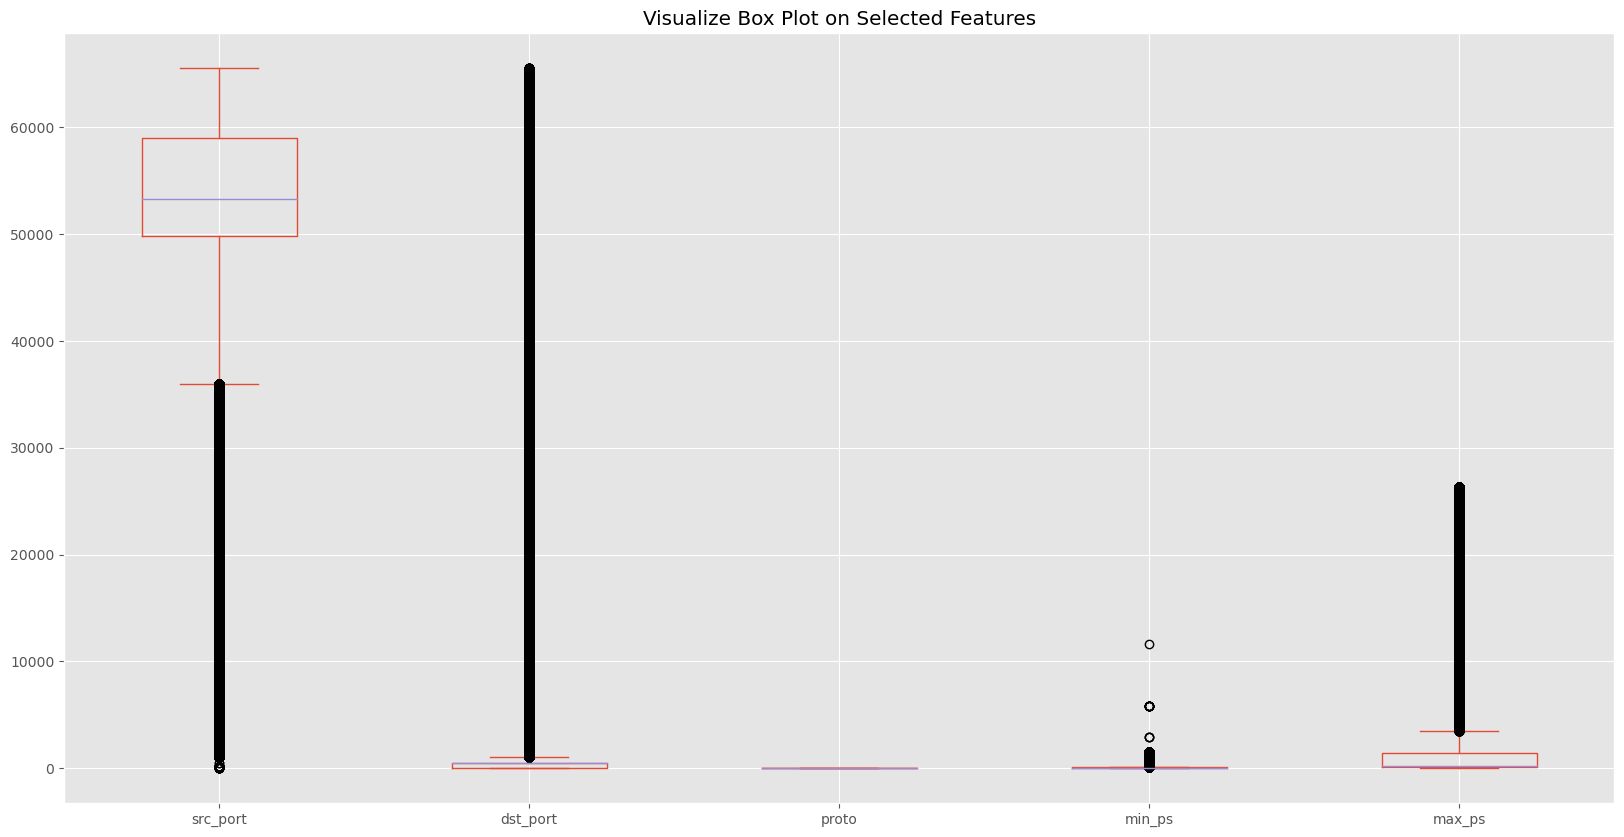

In [ ]:
# visualize boxplot on selected feature
data.iloc[:, :11].drop(["octetTotalCount", "src_ip_numeric", "pktTotalCount"], axis=1).plot(kind = "box", figsize = (20, 10)).set_title("Visualize Box Plot on Selected Features");

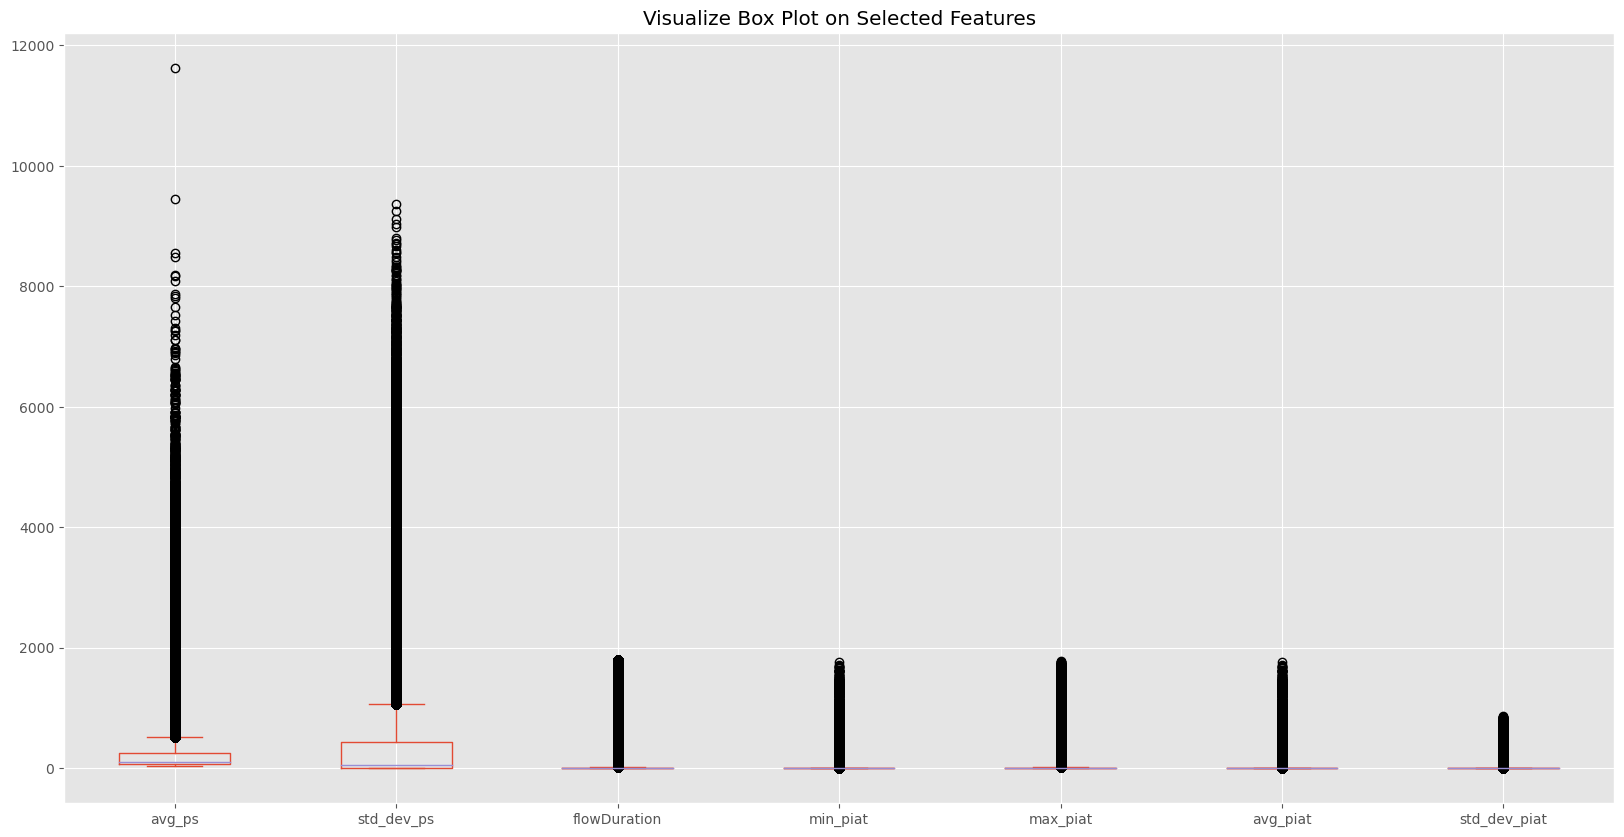

In [ ]:
# visualize boxplot on 11 feature
data.iloc[:, 11:22].drop(["flowStart", "flowEnd", "f_octetTotalCount", "f_pktTotalCount"], axis = 1).plot(kind = "box", figsize = (20, 10)).set_title("Visualize Box Plot on Selected Features");

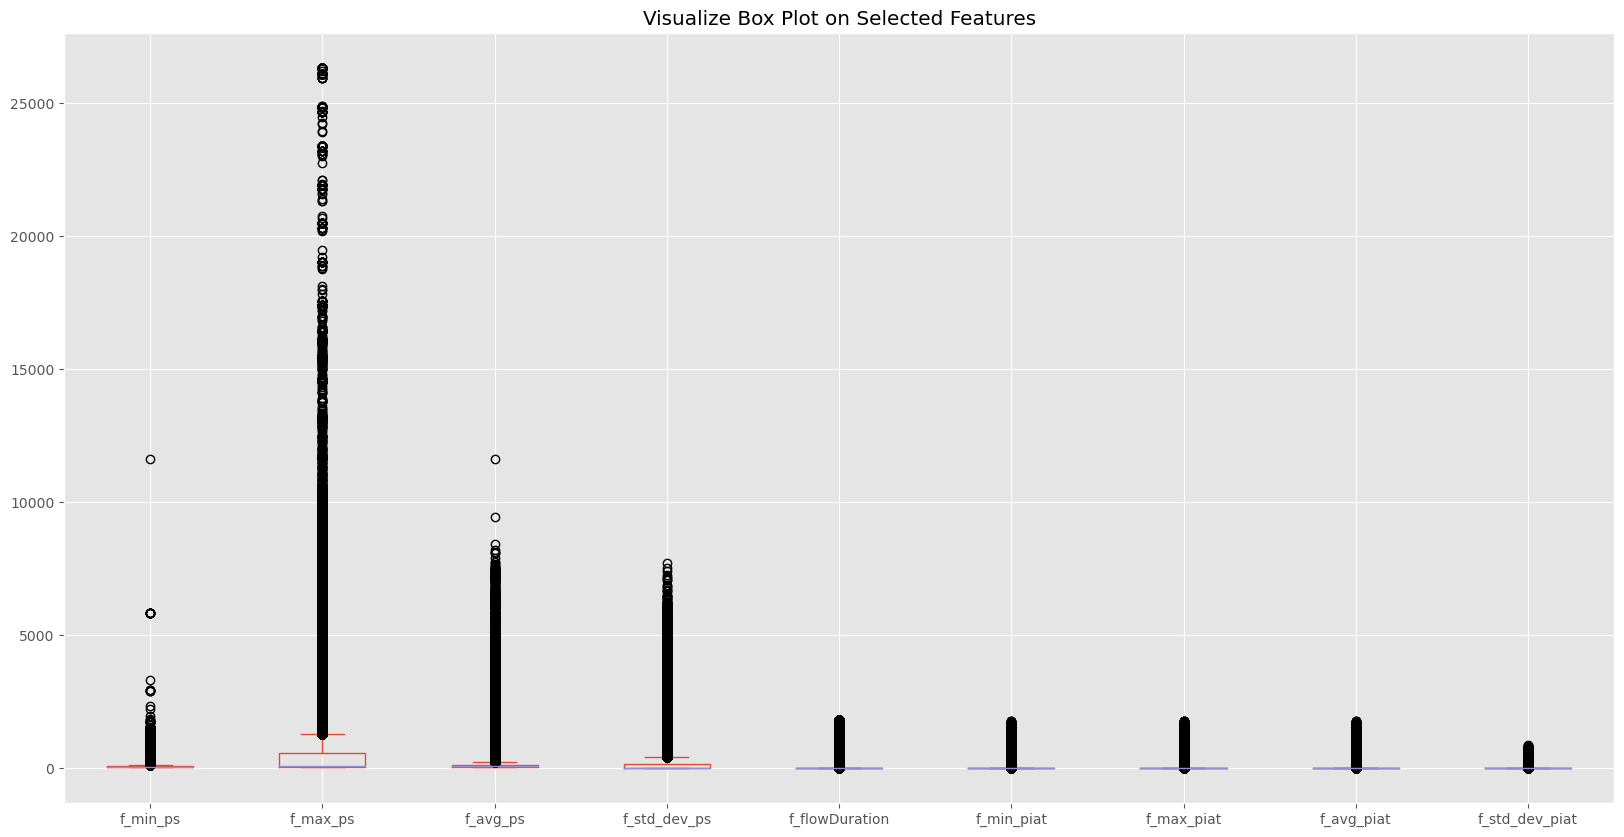

In [ ]:
# visualize boxplot on 11 feature
data.iloc[:, 22:33].drop(["f_flowEnd", "f_flowStart"], axis = 1).plot(kind = "box", figsize = (20, 10)).set_title("Visualize Box Plot on Selected Features");

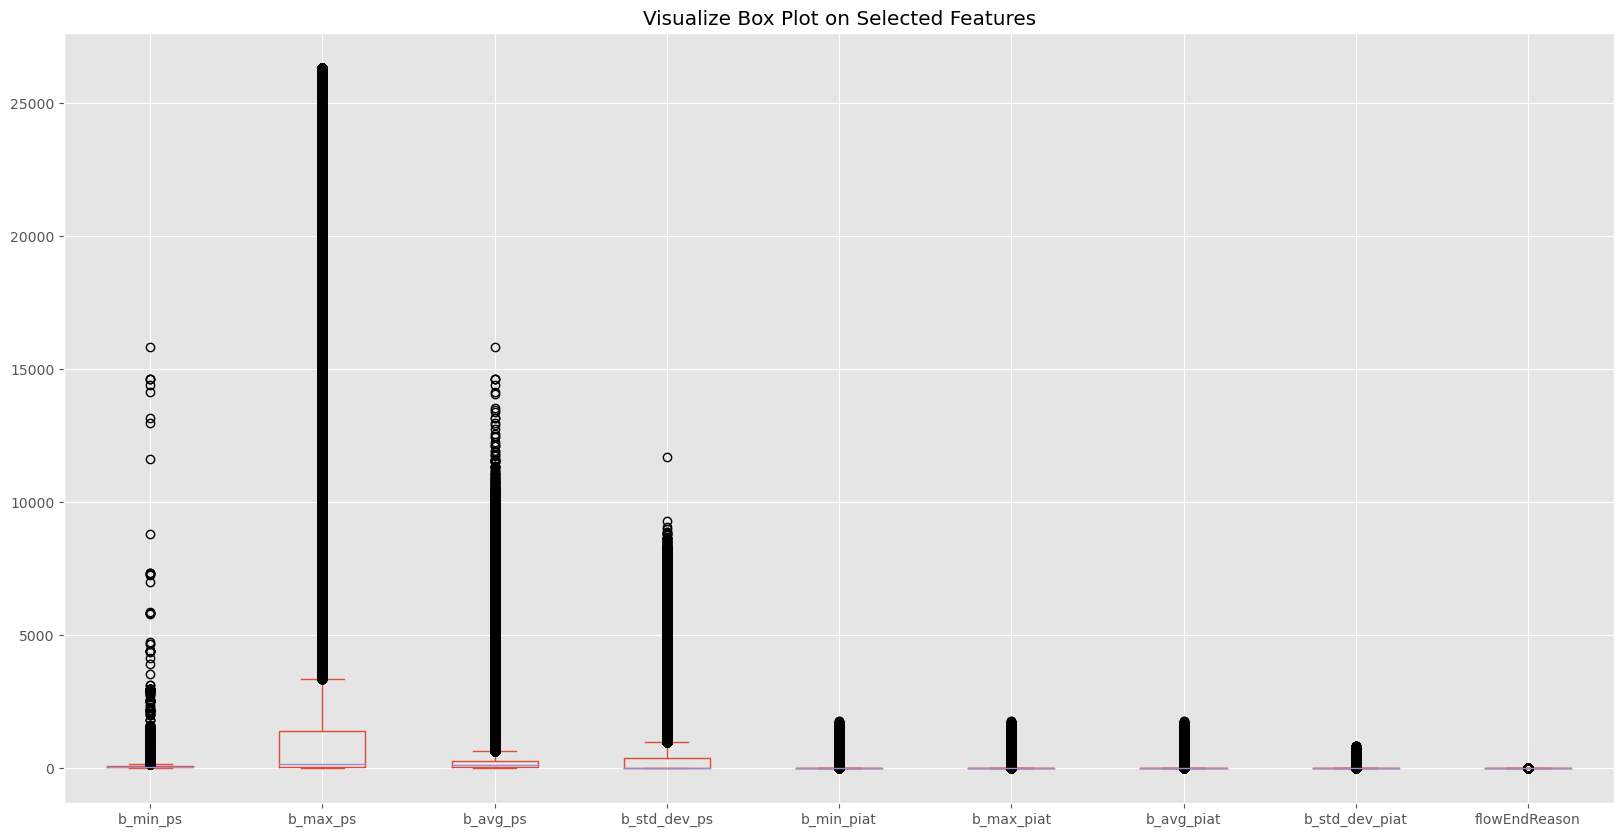

In [ ]:
# visualize boxplot on 11 feature
data.iloc[:, 33:].drop(["b_flowDuration", "b_flowStart", "b_flowEnd", "b_pktTotalCount", "b_octetTotalCount"], axis = 1).plot(kind = "box", figsize = (20, 10)).set_title("Visualize Box Plot on Selected Features");

In [ ]:
# check dimension
data.shape

(2574080, 50)

## 2. Feature Engineering

In [ ]:
# load libraries
import datetime
import ipaddress
from tqdm import tqdm

In [ ]:
# setup progess bar
tqdm.pandas()

### 2.1.1. IP Feature

In [ ]:
# extract numerical feature of dst_ip
data['dst_ip_numeric'] = data['dst_ip'].progress_apply(lambda x: int(ipaddress.IPv4Address(x)))

100%|████████████████████████████████████████████████████████████████████| 2574080/2574080 [00:13<00:00, 193264.93it/s]


In [ ]:
# overview sample rows on "ip" feature
data[[i for i in data.columns if "ip" in i]].head()

,src_ip_numeric,src_ip,dst_ip,dst_ip_numeric
15,3232266498,192.168.121.2,10.200.7.7,180881159
16,3232266498,192.168.121.2,10.200.7.5,180881157
17,3232266498,192.168.121.2,10.200.7.6,180881158
18,3232266498,192.168.121.2,10.200.7.7,180881159
19,3232266498,192.168.121.2,10.200.7.5,180881157


In [ ]:
# NOTE:
# - remove src_ip and dst_ip

### 2.1.2. Flow Feature

In [ ]:
# overview correlation on "flow" feature
data[[i for i in data.columns if "flo" in i]].corr()

,flowStart,flowEnd,flowDuration,f_flowStart,f_flowEnd,f_flowDuration,b_flowStart,b_flowEnd,b_flowDuration,flowEndReason
flowStart,1.000000,1.000000,-0.002163,1.000000,0.025462,-0.003306,-0.098675,-0.098675,-0.019003,-0.041376
flowEnd,1.000000,1.000000,-0.002053,1.000000,0.025492,-0.003198,-0.098681,-0.098681,-0.018981,-0.041375
flowDuration,-0.002163,-0.002053,1.000000,-0.002163,0.269084,0.985745,-0.050746,-0.050746,0.201915,0.011521
f_flowStart,1.000000,1.000000,-0.002163,1.000000,0.025462,-0.003306,-0.098675,-0.098675,-0.019003,-0.041376
f_flowEnd,0.025462,0.025492,0.269084,0.025462,1.000000,0.262060,-0.000372,-0.000372,0.833712,0.404245
f_flowDuration,-0.003306,-0.003198,0.985745,-0.003306,0.262060,1.000000,-0.057189,-0.057189,0.189942,0.018730
b_flowStart,-0.098675,-0.098681,-0.050746,-0.098675,-0.000372,-0.057189,1.000000,1.000000,0.363804,0.233857
b_flowEnd,-0.098675,-0.098681,-0.050746,-0.098675,-0.000372,-0.057189,1.000000,1.000000,0.363804,0.233857
b_flowDuration,-0.019003,-0.018981,0.201915,-0.019003,0.833712,0.189942,0.363804,0.363804,1.000000,0.458025
flowEndReason,-0.041376,-0.041375,0.011521,-0.041376,0.404245,0.018730,0.233857,0.233857,0.458025,1.000000


### 2.1.3. PS Feature

In [ ]:
# overview sample rows on "ps" feature
data[[i for i in data.columns if "ps" in i]].head()

,min_ps,max_ps,avg_ps,std_dev_ps,f_min_ps,f_max_ps,f_avg_ps,f_std_dev_ps,b_min_ps,b_max_ps,b_avg_ps,b_std_dev_ps
15,40,4271,1657.933333,1805.928304,40,409,60.052632,82.291186,40,4271,2825.615385,1552.560592
16,40,4274,593.700000,1267.914354,40,234,74.333333,71.539422,40,4274,1372.750000,1731.995580
17,40,4239,1273.000000,1589.132878,40,491,109.384615,162.721347,40,4239,2785.700000,1313.546958
18,40,5076,1639.296296,1942.887176,40,411,67.357143,95.359176,40,5076,3332.153846,1517.683298
19,40,471,112.111111,140.192284,40,234,81.200000,76.541231,40,471,150.750000,184.961314


In [ ]:
# overview correlation on "ps" feature
data[[i for i in data.columns if "ps" in i]].corr()

,min_ps,max_ps,avg_ps,std_dev_ps,f_min_ps,f_max_ps,f_avg_ps,f_std_dev_ps,b_min_ps,b_max_ps,b_avg_ps,b_std_dev_ps
min_ps,1.000000,-0.077129,0.093896,-0.110625,0.890964,-0.021979,0.257567,-0.100035,0.087742,-0.094211,-0.084056,-0.114834
max_ps,-0.077129,1.000000,0.838831,0.915553,-0.073875,0.378247,0.166108,0.304803,-0.121118,0.985094,0.862787,0.880009
avg_ps,0.093896,0.838831,1.000000,0.899804,0.096237,0.404349,0.414251,0.370761,-0.090116,0.813161,0.870182,0.808162
std_dev_ps,-0.110625,0.915553,0.899804,1.000000,-0.097561,0.431638,0.252425,0.406679,-0.124357,0.897363,0.921529,0.964384
f_min_ps,0.890964,-0.073875,0.096237,-0.097561,1.000000,-0.008998,0.293818,-0.095715,0.076994,-0.092072,-0.080219,-0.110853
f_max_ps,-0.021979,0.378247,0.404349,0.431638,-0.008998,1.000000,0.731398,0.937224,-0.168212,0.250093,0.194173,0.277535
f_avg_ps,0.257567,0.166108,0.414251,0.252425,0.293818,0.731398,1.000000,0.779317,-0.135613,0.048296,0.012135,0.082571
f_std_dev_ps,-0.100035,0.304803,0.370761,0.406679,-0.095715,0.937224,0.779317,1.000000,-0.186324,0.188868,0.142104,0.256032
b_min_ps,0.087742,-0.121118,-0.090116,-0.124357,0.076994,-0.168212,-0.135613,-0.186324,1.000000,-0.103745,-0.001058,-0.153800
b_max_ps,-0.094211,0.985094,0.813161,0.897363,-0.092072,0.250093,0.048296,0.188868,-0.103745,1.000000,0.881181,0.895478


### 2.1.4. Piat Feature

In [ ]:
# overview sample rows on "piat" feature
data[[i for i in data.columns if "piat" in i]].head()

,min_piat,max_piat,avg_piat,std_dev_piat,f_min_piat,f_max_piat,f_avg_piat,f_std_dev_piat,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat
15,2.145767e-06,0.556933,0.031510,0.105797,0.000057,0.557254,0.077024,0.154575,0.000002,0.556933,0.055443,0.135580
16,5.960464e-06,0.228134,0.026479,0.071335,0.000277,0.228269,0.047661,0.090346,0.000006,0.236055,0.079355,0.110807
17,9.536743e-07,0.003861,0.000584,0.000976,0.000046,0.003861,0.001070,0.001151,0.000005,0.006711,0.001110,0.002085
18,9.536743e-07,0.379798,0.028956,0.085259,0.000063,0.380593,0.057912,0.113642,0.000007,0.379798,0.062293,0.117025
19,9.608269e-05,0.216715,0.027571,0.071493,0.000230,0.219449,0.055141,0.094863,0.000807,0.216715,0.073439,0.101315


In [ ]:
# overview correlation on "ps" feature
data[[i for i in data.columns if "piat" in i]].corr()

,min_piat,max_piat,avg_piat,std_dev_piat,f_min_piat,f_max_piat,f_avg_piat,f_std_dev_piat,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat
min_piat,1.000000,0.395465,0.871544,0.019063,0.683604,0.402073,0.650158,0.021595,-0.002756,-0.014267,-0.005965,-0.013825
max_piat,0.395465,1.000000,0.691441,0.856051,0.564347,0.967492,0.738285,0.753785,0.393569,0.677260,0.498050,0.516025
avg_piat,0.871544,0.691441,1.000000,0.474455,0.828350,0.693432,0.895330,0.321101,0.298724,0.234335,0.317658,0.098861
std_dev_piat,0.019063,0.856051,0.474455,1.000000,0.455763,0.837651,0.663073,0.758401,0.590582,0.662900,0.681573,0.430907
f_min_piat,0.683604,0.564347,0.828350,0.455763,1.000000,0.579273,0.943357,0.016882,0.652926,0.370949,0.624775,0.005387
f_max_piat,0.402073,0.967492,0.693432,0.837651,0.579273,1.000000,0.759690,0.780827,0.389443,0.614328,0.487062,0.466416
f_avg_piat,0.650158,0.738285,0.895330,0.663073,0.943357,0.759690,1.000000,0.320071,0.622997,0.464104,0.650007,0.168721
f_std_dev_piat,0.021595,0.753785,0.321101,0.758401,0.016882,0.780827,0.320071,1.000000,0.030312,0.455325,0.189166,0.584093
b_min_piat,-0.002756,0.393569,0.298724,0.590582,0.652926,0.389443,0.622997,0.030312,1.000000,0.572532,0.953302,0.006731
b_max_piat,-0.014267,0.677260,0.234335,0.662900,0.370949,0.614328,0.464104,0.455325,0.572532,1.000000,0.730126,0.766810


###  2.1.5 Flow Start Timestamp

In [ ]:
# apply datetime extraction on flowStart
data['date'] = pd.to_datetime(data['flowStart'], unit='s')

### 2.1.5. Remain Feature

In [ ]:
# overview remain feature not been selected
remain_cols = [i for i in data.columns if not ("ip" in i or "flo" in i or "ps" in i or "piat" in i)]
data[remain_cols].head()

,src_port,dst_port,proto,pktTotalCount,octetTotalCount,f_pktTotalCount,f_octetTotalCount,b_pktTotalCount,b_octetTotalCount,category,application_protocol,web_service,date
15,49158,3128,6,45,74607,19,1141,26,73466,Web,Unknown,HTTP,2019-04-22 21:00:43.834909952
16,49164,3128,6,10,5937,6,446,4,5491,Web,Unknown,HTTP,2019-04-22 21:01:46.009030144
17,49165,3128,6,23,29279,13,1422,10,27857,Web,Unknown,HTTP,2019-04-22 21:01:58.033250048
18,49178,3128,6,27,44261,14,943,13,43318,Web,Unknown,HTTP,2019-04-22 21:02:44.839369984
19,49199,3128,6,9,1009,5,406,4,603,Web,Unknown,HTTP,2019-04-22 21:03:46.122639872


In [ ]:
data[remain_cols].corr()

,src_port,dst_port,proto,pktTotalCount,octetTotalCount,f_pktTotalCount,f_octetTotalCount,b_pktTotalCount,b_octetTotalCount
src_port,1.000000,-0.143061,-0.080243,-0.004739,-0.002886,-0.006144,-0.004456,-0.002542,-0.000560
dst_port,-0.143061,1.000000,-0.025087,0.001533,-0.000571,0.003172,0.003391,-0.000217,-0.002915
proto,-0.080243,-0.025087,1.000000,-0.013959,-0.014425,-0.010377,-0.002364,-0.014248,-0.015864
pktTotalCount,-0.004739,0.001533,-0.013959,1.000000,0.963419,0.874868,0.508304,0.905530,0.829524
octetTotalCount,-0.002886,-0.000571,-0.014425,0.963419,1.000000,0.853771,0.560543,0.862851,0.839402
f_pktTotalCount,-0.006144,0.003172,-0.010377,0.874868,0.853771,1.000000,0.788553,0.586712,0.513215
f_octetTotalCount,-0.004456,0.003391,-0.002364,0.508304,0.560543,0.788553,1.000000,0.159081,0.020427
b_pktTotalCount,-0.002542,-0.000217,-0.014248,0.905530,0.862851,0.586712,0.159081,1.000000,0.937308
b_octetTotalCount,-0.000560,-0.002915,-0.015864,0.829524,0.839402,0.513215,0.020427,0.937308,1.000000


## 2.2. Feature Selection

In [ ]:
data.shape

(2574080, 50)

In [ ]:
# remove column
data = data.drop(['src_ip', 'dst_ip', 'f_flowStart', 'f_flowEnd', 'f_flowDuration',  'b_flowStart', 'b_flowEnd', 'b_flowDuration', ], axis=1)

In [ ]:
data.shape

(2574080, 42)

In [ ]:
# copy data
data_copy = data.copy()
data = data_copy.copy()

## 2.3. Target Elimination

In [ ]:
# remove target class
data = data[data['category'] != "Unspecified"]
data = data[data['web_service'] != "TLS"]
data = data[data['web_service'] != "DNS"]
data = data[data['web_service'] != "HTTP"]
data = data[data['web_service'] != "HTTP_Proxy"]
data = data[data['category'] != "Network"]
data = data[data['category'] != "System"]
data = data[data['category'] != "RemoteAccess"]
data = data[data['category'] != "RPC"]
data = data[data['proto'] != 1]
data = data[data['web_service'] != "BitTorrent"]
data = data[data['web_service'] != "MSN"]
data = data[data['web_service'] != "DataSaver"]
data = data[data['web_service'] != "GoogleServices"]
data = data[data['web_service'] != "Office365"]
data = data[data['web_service'] != "Cloudflare"]
data = data[data['web_service'] != "WindowsUpdate"]

## 2.4. Feature Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
data["src_ip_numeric"] = labelencoder.fit_transform(data["src_ip_numeric"])
data["dst_ip_numeric"] = labelencoder.fit_transform(data["dst_ip_numeric"])
data["src_port"] = labelencoder.fit_transform(data["src_port"])
data["dst_port"] = labelencoder.fit_transform(data["dst_port"])
data["proto"] = labelencoder.fit_transform(data["proto"])

In [ ]:
# check dimension
data.sample(5)

,flow_key,src_ip_numeric,src_port,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,max_ps,avg_ps,std_dev_ps,flowStart,flowEnd,flowDuration,min_piat,max_piat,avg_piat,std_dev_piat,f_pktTotalCount,f_octetTotalCount,f_min_ps,f_max_ps,f_avg_ps,f_std_dev_ps,f_min_piat,f_max_piat,f_avg_piat,f_std_dev_piat,b_pktTotalCount,b_octetTotalCount,b_min_ps,b_max_ps,b_avg_ps,b_std_dev_ps,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,flowEndReason,category,application_protocol,web_service,dst_ip_numeric,date
607082,ba88b2cd62628b3b862eee4634686711,467,36928,8,0,1,52,52,52,52.00,0.000000,1.556050e+09,1.556050e+09,0.000000,0.000000,0.000000,0.000000,0.000000,1,52,52,52,52.0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,2,SocialNetwork,TLS,Facebook,2151,2019-04-23 19:58:34.416110080
1018667,f58c9be917f1875cfad346348f5f5df7,405,40857,5,0,10,1421,40,767,142.10,223.041005,1.556137e+09,1.556137e+09,6.847617,0.000108,6.406883,0.760846,1.999710,6,522,40,310,87.0,99.824847,0.000295,6.406883,1.369523,2.524417,4,899,40,767,224.75,313.106511,0.000682,6.461161,2.282379,2.959014,3,Web,HTTP,Microsoft,11561,2019-04-24 20:13:38.560800000
2307793,01da37044321ce1c2f3ad2074c04c3d6,464,54449,4,1,1,61,61,61,61.00,0.000000,1.559658e+09,1.559658e+09,0.000000,0.000000,0.000000,0.000000,0.000000,1,61,61,61,61.0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,2,Web,DNS,Google,13335,2019-06-04 14:20:13.660780032
1634444,e47ee5bbfdb2d5b27d65b3d4ea84afc4,587,53380,8,0,2,80,40,40,40.00,0.000000,1.556288e+09,1.556288e+09,0.000038,0.000038,0.000038,0.000038,0.000000,1,40,40,40,40.0,0.000000,0.000000,0.000000,0.000000,0.000000,1,40,40,40,40.00,0.000000,0.000000,0.000000,0.000000,0.000000,2,Web,TLS,Google,13627,2019-04-26 14:14:09.617789952
823325,d894123054ffc870e01cb9ae0bfb302e,104,40140,8,0,20,6533,40,1476,326.65,481.017492,1.556140e+09,1.556140e+09,31.398182,0.000003,28.598243,1.652536,6.366469,10,2246,40,1231,224.6,368.919829,0.000022,28.812015,3.488687,8.973529,10,4287,40,1476,428.70,553.014837,0.000091,28.804792,3.242751,9.037730,4,Web,TLS,Amazon,2917,2019-04-24 21:01:48.446070016


In [ ]:
# save data to excel
data.to_csv("data_cleaned2.csv", index=False)

In [ ]:
data2 = pd.read_csv("data_cleaned2.csv")

In [ ]:
data.shape

(2574080, 40)

## 2.5. Data Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# split feature train-test based on timestamp interval
data_train = data[(data['date'] >= datetime.datetime(year=2019, month=4, day=22)) & (data['date'] <= datetime.datetime(year=2019, month=4, day=30))]
data_test  = data[(data['date'] >= datetime.datetime(year=2019, month=6, day=4))]

In [ ]:
data=data.sort_values('date')

In [ ]:
# split dataset
data_train, data_test = train_test_split(
    data, test_size = 0.20, shuffle = False
)

# check dimension
print(data_train.shape, data_test.shape)

(956700, 44) (239175, 44)


In [ ]:
# split dataset
data_train, data_val = train_test_split(
    data_train, test_size = 0.25, shuffle=False
)

# check dimension
print(data_train.shape, data_val.shape)

(717525, 44) (239175, 44)


In [ ]:
# remove "date" column
data_train = data_train.drop("date", axis=1)
data_val  = data_val.drop("date", axis=1)
data_test  = data_test.drop("date", axis=1)

In [ ]:
# save data
data_train.to_csv("data_train.csv", index=False)
data_val.to_csv("data_val.csv", index=False)
data_test.to_csv("data_test.csv", index=False)

In [ ]:
data_train.shape, data_val.shape, data_test.shape

((717525, 43), (239175, 43), (239175, 43))

# 3. Data Sampling

![](https://miro.medium.com/v2/resize:fit:1400/1*P93SeDGPGw0MhwvCcvVcXA.png)

In [ ]:
# load libraries
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline

In [ ]:
data_train['index1'] = data_train.index

In [ ]:
# define feature and target
feature = data_train.drop(['flow_key', 'application_protocol', 'web_service', "category"], axis=1)
target  = data_train['web_service']

## 3.1. Data Normal Distribution

In [ ]:
# overview web_service distribution
target.value_counts()

Google       341434
Microsoft    103674
Facebook      72482
Amazon        52733
YouTube       33377
Messenger     27146
WhatsApp      14431
IMO           13783
GMail         12413
Dropbox       11680
Skype          9509
Instagram      9423
UbuntuONE      9067
Twitter        6373
Name: web_service, dtype: int64

In [ ]:
# concat dataframe and save to excel
data_norm = pd.concat([feature, target], axis = 1).reset_index().drop('index', axis=1)

# save to excel
data_norm.to_csv("data_train_norm.csv", index=False)

In [ ]:
# overview dataset
data_norm.sample(10)

,src_ip_numeric,src_port,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,max_ps,avg_ps,std_dev_ps,flowStart,flowEnd,flowDuration,min_piat,max_piat,avg_piat,std_dev_piat,f_pktTotalCount,f_octetTotalCount,f_min_ps,f_max_ps,f_avg_ps,f_std_dev_ps,f_min_piat,f_max_piat,f_avg_piat,f_std_dev_piat,b_pktTotalCount,b_octetTotalCount,b_min_ps,b_max_ps,b_avg_ps,b_std_dev_ps,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,flowEndReason,dst_ip_numeric,index1,web_service
593183,532,39367,8,0,18,1249,52,269,69.388889,48.542237,1.556117e+09,1.556117e+09,21.178941,0.000012,7.613564,1.245820,2.224394,8,665,52,269,83.125000,70.351684,0.018257,7.613604,3.025563,3.228668,10,584,52,60,58.400000,3.200000,0.037278,7.613617,2.351341,2.602510,5,13040,536414,Facebook
357643,529,54611,4,1,2,200,70,130,100.000000,30.000000,1.556034e+09,1.556034e+09,0.000740,0.000740,0.000740,0.000740,0.000000,1,70,70,70,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,130,130,130,130.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,13335,321438,Google
577007,133,42618,8,0,31,4073,40,745,131.387097,183.741347,1.559682e+09,1.559682e+09,99.367161,0.000002,45.031363,3.312239,11.268299,15,2399,40,745,159.933333,217.682787,0.000005,45.031405,7.097654,15.659551,16,1674,40,604,104.625000,139.668749,0.000002,45.031405,6.623277,15.232325,3,15652,907080,Google
704836,571,40731,8,0,41,9699,40,1476,236.560976,431.164337,1.556290e+09,1.556291e+09,545.211295,0.000002,90.001447,13.630282,24.997440,19,2456,40,1071,129.263158,250.776655,0.000351,90.001489,30.289516,29.732255,22,7243,40,1476,329.227273,523.079251,0.000003,90.001505,23.819568,29.670043,5,1961,737985,Microsoft
1633,435,42309,22,0,32,7660,40,2285,239.375000,467.546772,1.556055e+09,1.556055e+09,1.001649,0.000004,0.279238,0.032311,0.069269,14,2744,40,855,196.000000,229.630760,0.000004,0.319771,0.077050,0.101995,18,4916,40,2285,273.111111,587.374089,0.000090,0.279238,0.058895,0.084802,3,84,256383,Microsoft
508116,659,41429,4,1,2,162,73,89,81.000000,8.000000,1.556136e+09,1.556136e+09,0.000440,0.000440,0.000440,0.000440,0.000000,1,73,73,73,73.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,89,89,89,89.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,13335,549617,Google
611138,42,48060,4,1,2,136,60,76,68.000000,8.000000,1.559669e+09,1.559669e+09,0.000491,0.000491,0.000491,0.000491,0.000000,1,60,60,60,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,76,76,76,76.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,13335,869387,Google
54969,309,24668,27,0,2,80,40,40,40.000000,0.000000,1.559669e+09,1.559669e+09,2.034802,2.034802,2.034802,2.034802,0.000000,2,80,40,40,40.000000,0.000000,2.034802,2.034802,2.034802,0.000000,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,2162,975516,WhatsApp
682658,507,54687,4,1,2,170,65,105,85.000000,20.000000,1.556054e+09,1.556054e+09,0.000321,0.000321,0.000321,0.000321,0.000000,1,65,65,65,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,105,105,105,105.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,13335,308354,Google
94631,158,49117,8,0,27,13378,40,2832,495.481481,736.376030,1.559770e+09,1.559770e+09,0.655169,0.000003,0.234771,0.025199,0.050015,13,1710,40,856,131.538462,217.667925,0.000017,0.234771,0.054597,0.071021,14,11668,40,2832,833.428571,874.397157,0.000003,0.235673,0.047942,0.062731,3,15426,1150069,YouTube


## 3.2. Data Oversampling Distribution

In [ ]:
target.value_counts()

Google       341434
Microsoft    103674
Facebook      72482
Amazon        52733
YouTube       33377
Messenger     27146
WhatsApp      14431
IMO           13783
GMail         12413
Dropbox       11680
Skype          9509
Instagram      9423
UbuntuONE      9067
Twitter        6373
Name: web_service, dtype: int64

In [ ]:
#data for oversampling
strategy1 = {"Twitter": 12000, "UbuntuONE": 16000, "Instagram":18000, "Skype": 18000, "Dropbox":22000, "GMail": 22000, "IMO": 26000, "WhatsApp": 26000, "Messenger": 32000}

In [ ]:
oversampling = RandomOverSampler(random_state = 31, sampling_strategy =strategy1)
feature_oversample, target_oversample = oversampling.fit_resample(feature, target)

In [ ]:
target_oversample.value_counts()

Google       341434
Microsoft    103674
Facebook      72482
Amazon        52733
YouTube       33377
Messenger     32000
WhatsApp      26000
IMO           26000
Dropbox       22000
GMail         22000
Skype         18000
Instagram     18000
UbuntuONE     16000
Twitter       12000
Name: web_service, dtype: int64

In [ ]:
# concat dataframe and save to excel
data_over = pd.concat([feature_oversample, target_oversample], axis = 1).reset_index().drop('index', axis=1)
data_over = data_over.sort_values('index1')

In [ ]:
data_over = data_over.drop("index1", axis=1)
# save to excel
data_over.to_csv("data_train_over2.csv", index=False)

## 3.3. Data Undersampling Distribution

In [ ]:
target.value_counts()

Google       341434
Microsoft    103674
Facebook      72482
Amazon        52733
YouTube       33377
Messenger     27146
WhatsApp      14431
IMO           13783
GMail         12413
Dropbox       11680
Skype          9509
Instagram      9423
UbuntuONE      9067
Twitter        6373
Name: web_service, dtype: int64

In [ ]:
#data for oversampling
strategy1 = {"Google": 30000, "Microsoft": 30000, "Facebook": 30000, "Amazon": 30000, "YouTube": 30000}

In [ ]:
# define oversampling object
undersampling = RandomUnderSampler(random_state = 31,  sampling_strategy =strategy1)

In [ ]:
# apply on dataset
feature_undersample, target_undersample = undersampling.fit_resample(feature, target)

In [ ]:
# overview target oversamspled distribution
target_undersample.value_counts()

Amazon       30000
Facebook     30000
Google       30000
Microsoft    30000
YouTube      30000
Messenger    27146
WhatsApp     14431
IMO          13783
GMail        12413
Dropbox      11680
Skype         9509
Instagram     9423
UbuntuONE     9067
Twitter       6373
Name: web_service, dtype: int64

In [ ]:
# concat dataframe and save to excel
data_under = pd.concat([feature_undersample, target_undersample], axis = 1).reset_index().drop('index', axis=1)
data_under = data_under.sort_values('index1')

In [ ]:
data_under = data_under.drop('index1', axis=1)

In [ ]:
# save to excel
data_under.to_csv("data_train_under2.csv", index=False)

In [ ]:
# overview dataset
data_under.sample(10)

,src_ip_numeric,src_port,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,max_ps,avg_ps,std_dev_ps,flowStart,flowEnd,flowDuration,min_piat,max_piat,avg_piat,std_dev_piat,f_pktTotalCount,f_octetTotalCount,f_min_ps,f_max_ps,f_avg_ps,f_std_dev_ps,f_min_piat,f_max_piat,f_avg_piat,f_std_dev_piat,b_pktTotalCount,b_octetTotalCount,b_min_ps,b_max_ps,b_avg_ps,b_std_dev_ps,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,flowEndReason,dst_ip_numeric,web_service
96154,311,53856,8,0,25,3280,40,714,131.200000,178.038198,1.556659e+09,1.556659e+09,45.368496,0.000002,45.008636,1.890354,8.990839,11,1889,40,714,171.727273,226.337275,0.000004,45.041626,4.536845,13.501742,14,1391,40,500,99.357143,118.521612,0.000012,45.008680,3.489864,11.985511,2,13693,Google
231549,134,42249,27,0,132,13813,40,1543,104.643939,160.857557,1.556290e+09,1.556290e+09,48.114981,0.000002,10.197823,0.367290,1.457627,75,7673,40,1082,102.306667,122.677134,0.000005,10.295910,0.649498,1.904125,57,6140,52,1543,107.719298,200.256218,0.000002,14.432434,0.858184,2.555901,5,2162,WhatsApp
164125,271,48652,8,0,12,3314,52,2550,276.166667,687.127697,1.559669e+09,1.559669e+09,0.043277,0.000005,0.020212,0.003934,0.005594,7,548,52,221,78.285714,58.355351,0.000005,0.024706,0.007199,0.008066,5,2766,52,2550,553.200000,998.404808,0.003192,0.020212,0.010750,0.006094,3,13014,Messenger
80975,444,40640,4,1,2,165,61,104,82.500000,21.500000,1.559766e+09,1.559766e+09,0.000290,0.000290,0.000290,0.000290,0.000000,1,61,61,61,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,104,104,104,104.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,13335,GMail
245228,90,49312,4,1,2,300,61,239,150.000000,89.000000,1.556656e+09,1.556656e+09,0.000703,0.000703,0.000703,0.000703,0.000000,1,61,61,61,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,239,239,239,239.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,13335,YouTube
187671,391,47613,4,1,2,242,70,172,121.000000,51.000000,1.556315e+09,1.556315e+09,0.001049,0.001049,0.001049,0.001049,0.000000,1,70,70,70,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,172,172,172,172.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,13335,Microsoft
120218,24,51232,57,1,2,58,29,29,29.000000,0.000000,1.556288e+09,1.556288e+09,0.299839,0.299839,0.299839,0.299839,0.000000,1,29,29,29,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,29,29,29,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,12825,IMO
38476,46,55407,8,0,6,252,40,52,42.000000,4.472136,1.556293e+09,1.556293e+09,0.167744,0.000120,0.156418,0.033549,0.061560,4,172,40,52,43.000000,5.196152,0.000499,0.156817,0.055915,0.071464,2,80,40,40,40.000000,0.000000,0.156418,0.156418,0.156418,0.000000,3,13109,Dropbox
18689,407,53364,8,0,17,6220,40,2362,365.882353,675.846648,1.559770e+09,1.559770e+09,0.257977,0.000004,0.174786,0.016124,0.042977,10,734,40,236,73.400000,65.787841,0.000030,0.185288,0.028664,0.057729,7,5486,40,2362,783.714286,897.953501,0.000005,0.174786,0.041183,0.062624,3,5070,Amazon
185946,658,50266,4,1,2,324,80,244,162.000000,82.000000,1.559659e+09,1.559659e+09,0.000533,0.000533,0.000533,0.000533,0.000000,1,80,80,80,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,244,244,244,244.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,13335,Microsoft


In [ ]:
data_over.shape, data_under.shape

((795700, 40), (263825, 40))